In [1]:
#https://www.cockroachlabs.com/docs/stable/start-a-local-cluster-in-docker-linux.html#step-7-stop-the-cluster

In [2]:
import json

In [3]:
from sqlalchemy import create_engine, Column, String, Integer, func
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.dialects.postgresql import ARRAY
from sqlalchemy.orm import sessionmaker
from geoalchemy2 import Geometry 
from tqdm import tqdm

In [4]:
%%time
with open('../data/13_266069_040_003 L02 PAS.json', 'r') as file:
    # Load the JSON data into a Python dictionary
    data = json.load(file)

CPU times: user 7.43 s, sys: 835 ms, total: 8.26 s
Wall time: 8.26 s


In [5]:
import shapely
from shapely.geometry import shape

In [6]:
# Define the base class for ORM
Base = declarative_base()

# Define the Annotation class
class Annotation(Base):
    __tablename__ = 'annotations'

    id = Column(Integer, primary_key=True)
    name = Column(String)
    color = Column(ARRAY(Integer))
    coordinates = Column(Geometry('POLYGON'))

/tmp/ipykernel_51851/3422624568.py:2: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [7]:
# Create a connection to CockroachDB
#engine = create_engine('cockroachdb://root@170.140.138.73:26257/test1',echo=True)
engine = create_engine('cockroachdb://root@localhost:26257/test1')#,echo=True)

In [8]:
from sqlalchemy_utils import database_exists, create_database

In [9]:
if not database_exists(engine.url):
    print("creating")
    create_database(engine.url)

print(database_exists(engine.url))

True


In [11]:
create_database(engine.url)

In [12]:
# Create the table if it doesn't exist
Base.metadata.create_all(engine)

In [ ]:
%%time
#--- reasonable
# Create a session
Session = sessionmaker(bind=engine)
session = Session()

for i,d in enumerate(tqdm(data)):
    shapely_geometry = shape(d['geometry'])
    new_annotation = Annotation(name=d['properties']['classification']['name'],
                                color=d['properties']['classification']['color'], 
                                coordinates=shapely_geometry.wkt)


    session.add(new_annotation)
    if i % 1_000 ==0:
        print("doing commit")
        session.commit()
        continue
        
    # if i % 100_000 == 0:
    #     break
session.commit()


# Close the session
session.close()

In [ ]:
%%time
# Create a session
Session = sessionmaker(bind=engine)
session = Session()


all_annos=[]
for d in tqdm(data):
    shapely_geometry = shape(d['geometry'])
    new_annotation = Annotation(name=d['properties']['classification']['name'],
                                color=d['properties']['classification']['color'], 
                                coordinates=shapely_geometry.wkt)

    all_annos.append(new_annotation)
    if(len(all_annos))==10:
        break

In [ ]:
%%time    
session.add_all(all_annos)
session.commit()


# Close the session
session.close()

In [ ]:
%%time
# Create a session
Session = sessionmaker(bind=engine)
session = Session()


all_annos=[]
for d in tqdm(data):
    shapely_geometry = shape(d['geometry'])
    new_annotation = Annotation(name=d['properties']['classification']['name'],
                                color=d['properties']['classification']['color'], 
                                coordinates=shapely_geometry.wkt)

    all_annos.append(new_annotation)

In [ ]:
%%time
# Create a session
Session = sessionmaker(bind=engine)
session = Session()

for i,d in enumerate(tqdm(data)):
    shapely_geometry = shape(d['geometry'])
    new_annotation = Annotation(name=d['properties']['classification']['name'],
                                color=d['properties']['classification']['color'], 
                                coordinates=shapely_geometry.wkt)


    session.add(new_annotation)
    if i % 1000 ==0:
        print("doing commit")
        session.commit()
        continue
        
    if i % 100_000 == 0:
        break
session.commit()


# Close the session
session.close()

In [ ]:
#---------- below is scratch code for testing query

In [14]:
from shapely.geometry import Point
from geoalchemy2.functions import ST_Contains, ST_Intersects, ST_AsBinary, ST_AsText
from geoalchemy2 import WKTElement

In [15]:
import numpy as np

In [16]:
query_geom = shape(data[0]['geometry'])
#query_geom = shape(np.random.choice(data)['geometry'])

In [17]:
Session = sessionmaker(bind=engine)
session = Session()

In [18]:
##%%timeit

query_geom = shape(np.random.choice(data)['geometry'])
results = session.query(Annotation).filter(ST_Contains(Annotation.coordinates, query_geom.centroid.wkt)).all()

In [19]:
# Print the results
from shapely import wkt, wkb
for i,annotation in enumerate(results):
    print(i,annotation.name)
    shapely_obj=wkb.loads(str(annotation.coordinates))
    print(shapely_obj.centroid)

0 tubule
POINT (32533.823362722473 30346.606394603445)
1 nuclei
POINT (32443.14500572176 30503.687264999186)
2 te+lumen
POINT (32512.55430113517 30351.890508199416)


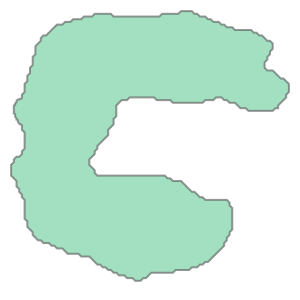

In [21]:
shapely_obj

In [22]:

shapely_obj.centroid.y

30351.890508199416

In [ ]:
#--- below is scratch code for testing converting

In [23]:
from shapely.geometry import mapping

In [24]:
geo=mapping(shapely_obj)

In [25]:
import geojson

In [26]:

props={"color":[1,2,3],"name":"tubule"}

In [27]:
props

{'color': [1, 2, 3], 'name': 'tubule'}

In [28]:
feature = geojson.Feature(geometry=geo, properties=props)

In [29]:
geojson.dumps(feature)

'{"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[32521.0, 30136.0], [32520.0, 30137.0], [32519.0, 30138.0], [32518.0, 30139.0], [32517.0, 30140.0], [32516.0, 30140.0], [32515.0, 30140.0], [32514.0, 30140.0], [32513.0, 30140.0], [32512.0, 30140.0], [32511.0, 30140.0], [32510.0, 30140.0], [32509.0, 30140.0], [32508.0, 30141.0], [32507.0, 30142.0], [32506.0, 30143.0], [32505.0, 30144.0], [32504.0, 30144.0], [32503.0, 30144.0], [32502.0, 30144.0], [32501.0, 30144.0], [32500.0, 30144.0], [32499.0, 30144.0], [32498.0, 30144.0], [32497.0, 30144.0], [32496.0, 30145.0], [32495.0, 30146.0], [32494.0, 30147.0], [32493.0, 30148.0], [32492.0, 30148.0], [32491.0, 30148.0], [32490.0, 30148.0], [32489.0, 30148.0], [32488.0, 30149.0], [32487.0, 30150.0], [32486.0, 30151.0], [32485.0, 30152.0], [32484.0, 30152.0], [32483.0, 30152.0], [32482.0, 30152.0], [32481.0, 30152.0], [32480.0, 30153.0], [32479.0, 30154.0], [32478.0, 30155.0], [32477.0, 30156.0], [32476.0, 30156.0], [32475.0, 